# Data Exploration

## API calls

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df20 = pd.read_csv('input/2020-08-20_sds011_sensor_6842.csv', sep=';')
df21 = pd.read_csv('input/2020-08-21_sds011_sensor_6842.csv', sep=';')
df22 = pd.read_csv('input/2020-08-22_sds011_sensor_6842.csv', sep=';')
df23 = pd.read_csv('input/2020-08-23_sds011_sensor_6842.csv', sep=';')
df24 = pd.read_csv('input/2020-08-24_sds011_sensor_6842.csv', sep=';')

In [3]:
df20

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-20T00:01:37,4.47,NaN,NaN,1.50,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-20T00:04:09,3.87,NaN,NaN,1.23,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-20T00:06:41,2.20,NaN,NaN,1.23,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-20T00:09:12,2.83,NaN,NaN,1.30,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-20T00:11:44,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
562,6842,SDS011,3460,52.028,8.916,2020-08-20T23:47:15,1.50,NaN,NaN,1.00,NaN,NaN
563,6842,SDS011,3460,52.028,8.916,2020-08-20T23:49:47,1.83,NaN,NaN,1.00,NaN,NaN
564,6842,SDS011,3460,52.028,8.916,2020-08-20T23:52:23,2.20,NaN,NaN,1.37,NaN,NaN
565,6842,SDS011,3460,52.028,8.916,2020-08-20T23:54:54,2.77,NaN,NaN,1.27,NaN,NaN


In [4]:
df20['timestamp'] = pd.to_datetime(df20['timestamp'])
df21['timestamp'] = pd.to_datetime(df21['timestamp'])
df22['timestamp'] = pd.to_datetime(df22['timestamp'])
df23['timestamp'] = pd.to_datetime(df23['timestamp'])
df24['timestamp'] = pd.to_datetime(df24['timestamp'])

In [5]:
df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df20 = df20.set_index('timestamp')
df = df.set_index('timestamp')
#df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df = df20.copy()

In [6]:
df

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-20 00:01:37,6842,SDS011,3460,52.028,8.916,4.47,NaN,NaN,1.50,NaN,NaN
2020-08-20 00:04:09,6842,SDS011,3460,52.028,8.916,3.87,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:06:41,6842,SDS011,3460,52.028,8.916,2.20,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:09:12,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.30,NaN,NaN
2020-08-20 00:11:44,6842,SDS011,3460,52.028,8.916,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24 23:49:53,6842,SDS011,3460,52.028,8.916,12.30,NaN,NaN,9.23,NaN,NaN
2020-08-24 23:52:24,6842,SDS011,3460,52.028,8.916,12.53,NaN,NaN,10.10,NaN,NaN
2020-08-24 23:54:56,6842,SDS011,3460,52.028,8.916,12.87,NaN,NaN,10.40,NaN,NaN


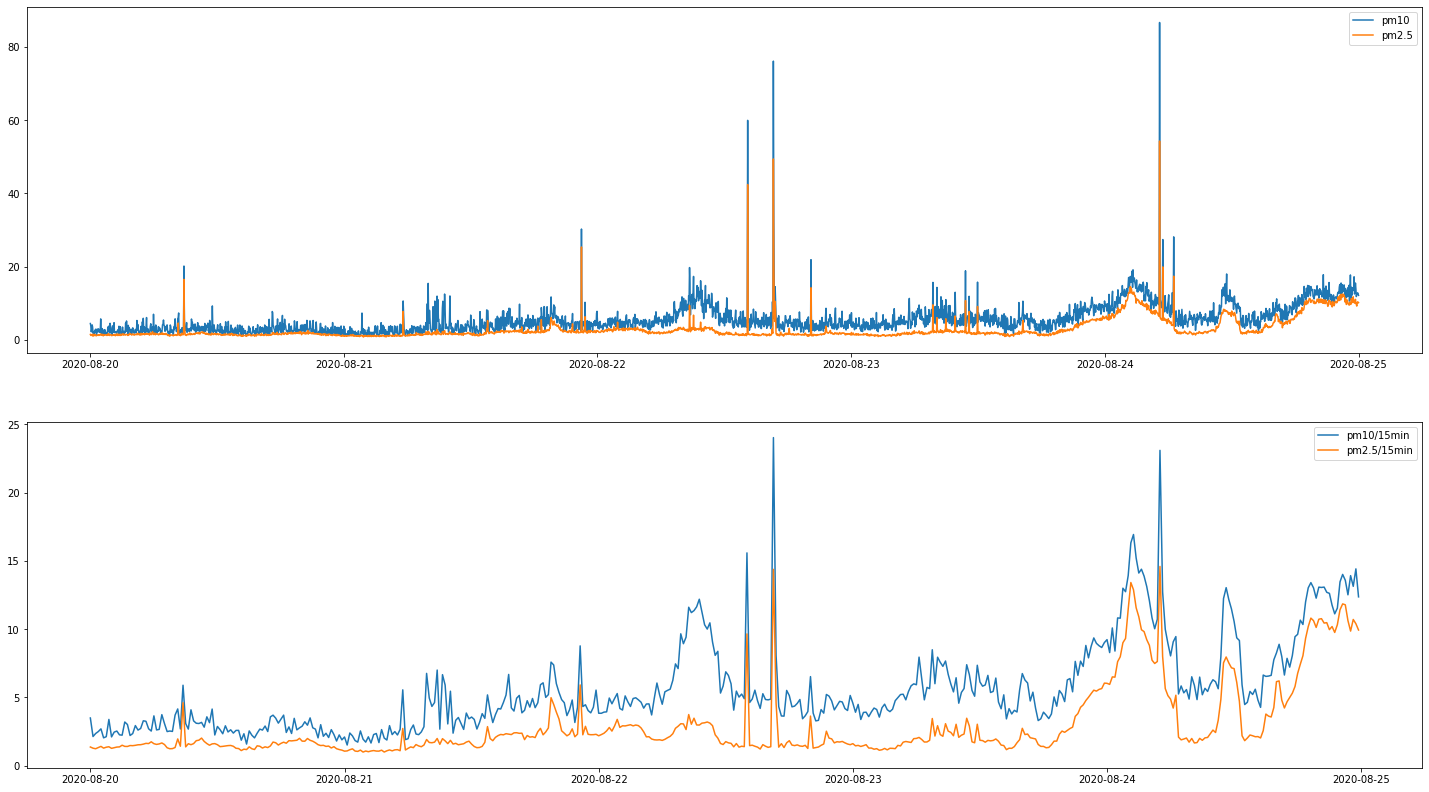

In [7]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(df['P1'], '-', label = 'pm10')
plt.plot(df['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 15
df = df.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(df['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(df['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()